In [1]:
import pandas as pd

# load the training dataset (excluding rows with null values)
penguins = pd.read_csv('penguins.csv').dropna()

# Deep Learning models work best when features are on similar scales
# In a real solution, we'd implement some custom normalization for each feature, but to keep things simple
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
47,37.5,18.9,17.9,29.75,0
13,38.6,21.2,19.1,38.00,0
335,45.6,19.4,19.4,35.25,2
88,38.3,19.2,18.9,39.50,0
32,39.5,17.8,18.8,33.00,0
27,40.5,17.9,18.7,32.00,0
209,45.5,15.0,22.0,50.00,1
126,38.8,17.6,19.1,32.75,0
266,46.2,14.1,21.7,43.75,1
300,46.7,17.9,19.5,33.00,2


In [2]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 41.8 19.4 19.8 44.5 0 ] Adelie
[ 45.4 18.7 18.8 35.25 2 ] Chinstrap
[ 39.5 16.7 17.8 32.5 0 ] Adelie
[ 37.0 16.5 18.5 34.0 0 ] Adelie
[ 47.8 15.0 21.5 56.5 1 ] Gentoo
[ 41.4 18.6 19.1 37.0 0 ] Adelie
[ 50.3 20.0 19.7 33.0 2 ] Chinstrap
[ 50.0 15.3 22.0 55.5 1 ] Gentoo
[ 47.3 15.3 22.2 52.5 1 ] Gentoo
[ 50.4 15.7 22.2 57.5 1 ] Gentoo


In [3]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 239, Test Set: 103 

Sample of features and labels:
[36.4  17.   19.5  33.25] 0 (Adelie)
[49.  19.6 21.2 43. ] 2 (Chinstrap)
[38.2 20.  19.  39. ] 0 (Adelie)
[39.2 21.1 19.6 41.5] 0 (Adelie)
[49.7 18.6 19.5 36. ] 2 (Chinstrap)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[36.3 19.5 19.  38. ] 0 (Adelie)
[50.1 15.  22.5 50. ] 1 (Gentoo)
[50.4 15.3 22.4 55.5] 1 (Gentoo)
[46.7 15.3 21.9 52. ] 1 (Gentoo)
[41.1  19.   18.2  34.25] 0 (Adelie)
[41.1 17.5 19.  39. ] 0 (Adelie)
[50.7 15.  22.3 55.5] 1 (Gentoo)
[52.  20.7 21.  48. ] 2 (Chinstrap)
[50.8 17.3 22.8 56. ] 1 (Gentoo)
[50.  15.9 22.4 53.5] 1 (Gentoo)
[43.2  19.   19.7  47.75] 0 (Adelie)
[45.2 16.4 22.3 59.5] 1 (Gentoo)
[41.1 18.1 20.5 43. ] 0 (Adelie)
[37.5  18.9  17.9  29.75] 0 (Adelie)
[47.2  13.7  21.4  49.25] 1 (Gentoo)
[49.3 19.9 20.3 40.5] 2 (Chinstrap)
[48.6 16.  23.  58. ] 1 (Gentoo)
[35.5 17.5 19.  37. ] 0 (Adelie)


### TensorFlow libraries

In [4]:
import tensorflow
import keras
#from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
#from tensorflow.keras import optimizers
from keras.optimizers import Adam

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:', keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

2024-06-05 17:29:59.663182: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Libraries imported.
Keras version: 3.1.1
TensorFlow version: 2.16.1


In [5]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


### Define a classifier neural network

In [6]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(penguin_classes), input_dim=hl, activation='softmax'))

print(model.summary())

/Users/narasimharaovaddi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
#hyper-parameters for optimizer
learning_rate = 0.001
opt = keras.optimizers.Adam(learning_rate = learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1856 - loss: 1.1474 - val_accuracy: 0.0097 - val_loss: 1.1009
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0454 - loss: 1.0905 - val_accuracy: 0.1650 - val_loss: 1.0534
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2172 - loss: 1.0437 - val_accuracy: 0.4854 - val_loss: 0.9530
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4262 - loss: 0.9555 - val_accuracy: 0.4854 - val_loss: 0.8734
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4995 - loss: 0.8950 - val_accuracy: 0.7573 - val_loss: 0.8184
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - loss: 0.8530 - val_accuracy: 0.7961 - val_loss: 0.7758
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7290 - loss: 0.8181 - val_accuracy: 0.7961 - val_loss: 0.7396
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7371 - loss: 0.7885 - val_accuracy: 0.8058 - val_loss:

### Review training and validation loss

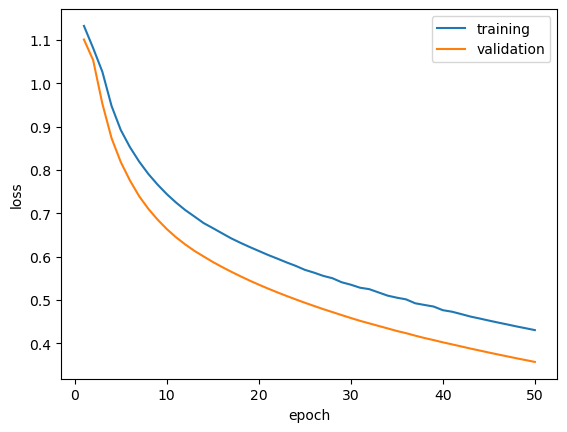

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### View the learned weights and biases

In [9]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-0.46710524 -0.27796087 -0.06036299 -0.24878569 -0.5240997   0.28743738
  -0.58851916 -0.5608071  -0.5529891  -0.5301867 ]
 [ 0.03794014 -0.04475778  0.20731837  0.7210387  -0.25159603  0.25397426
   0.26711503 -0.00543994 -0.48686016  0.21800435]
 [-0.08040589  0.16196758 -0.17687228  0.14266442 -0.31404334 -0.23908547
  -0.18234324  0.2651639   0.07040077  0.64379597]
 [-0.46931958 -0.3670365  -0.10815799 -0.06699529 -0.3683268  -0.53285164
   0.41685492 -0.5644321   0.19367743 -0.56858826]] 
Biases:
 [ 0.          0.          0.          0.09186295  0.          0.
 -0.00816043  0.          0.          0.        ]
------------
Weights:
 [[-0.05451143  0.17727154 -0.38259423  0.26114994  0.46586144 -0.52571887
  -0.0965054  -0.32295358 -0.26145172 -0.5158703 ]
 [ 0.20951039 -0.4194966  -0.52132726 -0.29415205 -0.31038016 -0.04200679
   0.14012128 -0.10913017  0.44045937 -0.14325643]
 [ 0.49497318  0.27421045  0.07695794 -0.38841033  0.34831834 -0.2756763
  -0.

### Evaluate model performance

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


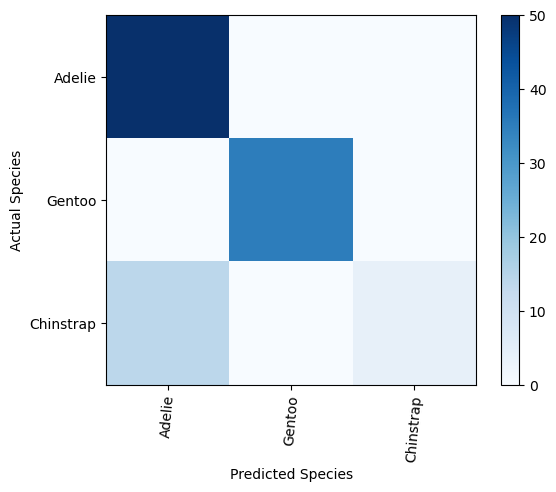

In [10]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

### Save model

In [11]:
# Save the trained model
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/penguin-classifier.h5


In [13]:
# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(predictions)
print(penguin_classes[predictions[0]])

New sample: [[50.4 15.3 20.  50. ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[1]
Gentoo
